# Image Classifier

Simple Sweet and Short Image Classifier

This code is based on code from [fastai course](https://github.com/fastai/course22)

In [1]:
#skip if duckduckgo_search already installed
!pip install -Uqq duckduckgo_search

In [4]:
from time import sleep
from fastcore.all import *
from duckduckgo_search import DDGS

def search_images(term, max_images=200, retries=3, delay=2):
    for i in range(retries):
        try:
            with DDGS() as ddgs:
                return L(ddgs.images(keywords=term, max_results=max_images)).itemgot('image')
        except Exception as e:
            if i == retries - 1: raise e
            print(f"Rate limited, retrying in {delay} seconds...")
            sleep(delay)
            delay *= 2  # Exponential backoff

In [5]:
urls = search_images("bird photos", max_images=1)
urls[0]

Rate limited, retrying in 2 seconds...


'https://images.pexels.com/photos/326900/pexels-photo-326900.jpeg?cs=srgb&dl=wood-flight-bird-326900.jpg&fm=jpg'

c:\Users\User\miniconda3\envs\fastbook\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


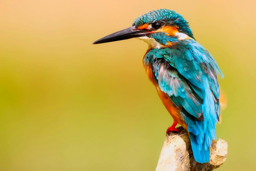

In [6]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0],dest,show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

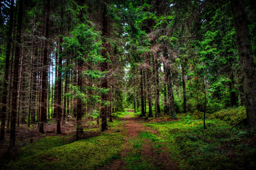

In [23]:
download_url(search_images('forest photos', max_images=1)[0],'forest.jpg',show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

In [5]:
searches = 'forest', 'bird'
path = Path('bird_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest,urls=search_images(f'{o} photo'))
    sleep(10)
    download_images(dest,urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest,urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

In [6]:
# verify images

failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

29

for above code

`get_image_files(path):`

Source: FastAI Library.
Purpose: This function is part of the FastAI library. It's used to get a list of all image files in a directory (recursively including subdirectories). It helps in gathering image data for machine learning tasks.


`verify_images(...):`

Source: FastAI Library.
Purpose: Also part of the FastAI library, this function checks if images in the provided list (from get_image_files) can be opened. It's useful for filtering out corrupt or unreadable image files before processing or training a model.

`Path.unlink:`

Source: Standard Python Library (pathlib module).
Purpose: Path is a class from Python’s pathlib module, and unlink is a method of the Path class. It is used to remove (or delete) a file at the given path. It’s similar to the os.remove function in the os module but is a part of the object-oriented approach provided by pathlib.

`map(...):`

Source: Standard Python functionality.
Purpose: map is a built-in Python function that applies a given function to each item of an iterable (like a list) and returns a map object (which is an iterator). In your code, map is used to apply the Path.unlink method to each path in the failed list.

c:\Users\User\miniconda3\envs\fastbook\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


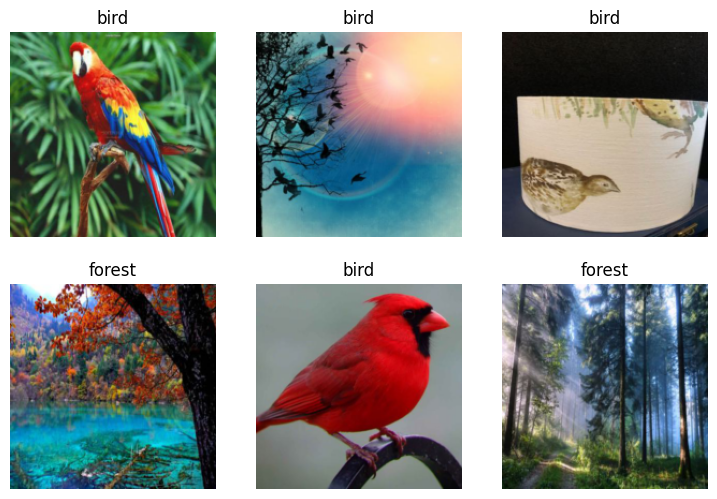

In [7]:
dls = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192,method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [8]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

c:\Users\User\miniconda3\envs\fastbook\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\User/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:03<00:00, 11.8MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.598179,0.045529,0.016129,00:59


epoch,train_loss,valid_loss,error_rate,time
0,0.087608,0.034984,0.012097,01:20
1,0.051052,0.040114,0.012097,01:15
2,0.032442,0.040406,0.012097,01:16


In [10]:
predicted_category,_,probs= learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {predicted_category}")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird
Probability it's a bird: 1.0000


In [11]:
# export model
learn.export('birdclassifier.pkl')

In [7]:
# import model
learn = load_learner('birdclassifier.pkl')

In [8]:
category_prediction,_,probs= learn.predict(PILImage.create('forest.jpg'))

print(f"This is a: {category_prediction}")

labels= learn.dls.vocab
print(f"{labels}")

for i, label in enumerate(labels):
    print(f"Probability it's a {label}: {probs[i]:.4f}")

This is a: forest
['bird', 'forest']
Probability it's a bird: 0.0000
Probability it's a forest: 1.0000
